In [115]:
import glob
import ssl 
import torch
import torch.nn
from matplotlib import pyplot as plt
ssl._create_default_https_context = ssl._create_unverified_context
from keras.datasets import mnist
import numpy as np

In [10]:
#loading the dataset

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [11]:
#utility functions 

def reshape(X):
    return X.reshape(X.shape[0],-1)

def softmax(Z):
    exp = torch.exp(Z)
    total = torch.sum(exp,axis = 1,keepdims = True)
    return exp/total
    

def one_hot(Y,C):
    arr = np.zeros((len(Y),C))
    arr[np.arange(len(Y)),Y] = 1;
    return arr

def sigmoid(Z):
    return 1/(1+(torch.exp(-Z)))
    

In [134]:
#hyperparameter initialization and data prepocessing

X_reshape = reshape(X_train)
X = torch.from_numpy(X_reshape).float()
Y = Y_train.tolist()
W = torch.randn(X.shape[1],10,requires_grad = True)
b = torch.randn(10,requires_grad = True)
M = len(Y)
lr = 0.01
X = X/255
losses = []

In [158]:
#training

for epoch in range(10):
    Z = X@W + b
    A = softmax(Z)
    cross_entropy = -torch.mean(A[torch.arange(M),Y].log())
    losses.append(cross_entropy.detach().item())
    print(cross_entropy.detach().item())
    W.grad = None
    b.grad = None
    cross_entropy.backward()
    W.data = W.data - lr*W.grad
    b.data = b.data - lr*b.grad


10.273191452026367
10.2562837600708
10.23941707611084
10.222591400146484
10.205808639526367
10.189066886901855
10.172367095947266
10.155706405639648
10.13908576965332
10.122506141662598


Text(0, 0.5, 'loss')

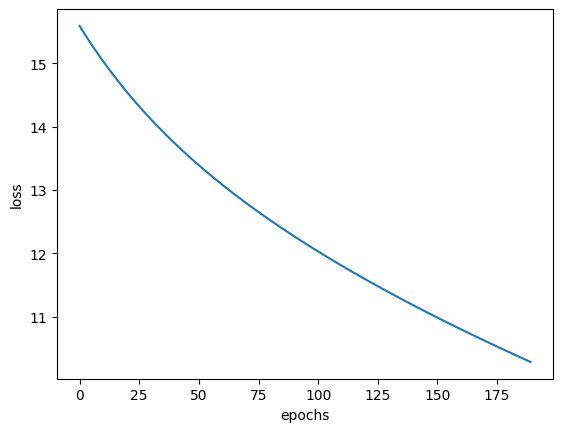

In [157]:
#plotting the loss curve

plt.plot(np.arange(len(losses)),losses)
plt.xlabel('epochs')
plt.ylabel('loss')

In [183]:
#testing
input_img = torch.from_numpy(X_test[0]).reshape(1,-1).float()/255
Z = input_img@W + b
A = softmax(Z)
prediction = torch.argmax(A)
prediction

tensor(5)